# Imbalanced Dataset

An imbalanced dataset is one where one class occurs in less frequency than other which makes them underrepresented. This dataset needs to be treated so that the models can properly train to learn from the "minority" class.

**Use cases:** Imbalanced dataset is a norm in some real-life scenarios such as fraud detection, rare disease identification, some anomaly/ outlier detections

**Strategies:** There are strategies to deal with imbalanced dataset and each strategy comes with its own set of resolutions.

1. Resampling: Increasing or removing instances from the input dataset to balace the number of instances for both minority and majority classes. <br>
- Undersampling: This involves removing instances of the majority class to balance the class distribution. <br>
- Oversampling: Creating duplicates or synthetically creating new instances of the minority class. These methods can be random (naive) or use techniques like SMOTE, ADASYN.<br>

2. Ensemble Models: Some modeling techniques like Bagging and Boosting can be tuned to deal with imbalanced datasets. Some examples in this category are Random Forest and AdaBoost.<br><br>

3. Anomaly Detection: Some anomaly detection techniques can be used to train to minority as anomalies in the dataset. Here we would treat the problem as a anomaly detection problem.<br><br>

4. Weighting algorithms: Some algoritms can be tuned to give higher weightage to minority class so model trains to be more sensitive to it.<br><br>

5. Cost-sensitivity: Tune the algorithm to have high penalty for misclassifying minority class.<br><br>

6. Evaluation Metrics: Choosing the right evaluation metric is importance for working with an imbalanced dataset. Usually F1 score, Area under the curve (AUC-ROC), Precision are good for working with imbalanced datasets. Accuracy and recall might not really help in most use-cases unless the problem statement calls for it.<br><br>

## Dataset information
Title: Bank Account Fraud Dataset Suite (NeurIPS 2022)
Kaggle link: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022?select=Variant+III.csv

Dataset Context: 
Each instance contains information about a bank opening application in tabular format.

The Bank Account Fraud (BAF) suite of datasets has been published at NeurIPS 2022 and it comprises a total of 6 different synthetic bank account fraud tabular datasets. BAF is a realistic, complete, and robust test bed to evaluate novel and existing methods in ML and fair ML, and the first of its kind!

This suite of datasets is:

Realistic, based on a present-day real-world dataset for fraud detection;
Biased, each dataset has distinct controlled types of bias;
Imbalanced, this setting presents a extremely low prevalence of positive class;
Dynamic, with temporal data and observed distribution shifts;
Privacy preserving, to protect the identity of potential applicants we have applied differential privacy techniques (noise addition), feature encoding and trained a generative model (CTGAN).

Why was this chosen: The number of fraudulent account opening applications are always imbalanced and a minority from genuine applications.

Metadata: https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf

Some important columns:
**fraud_bool:** If the application is fraudulent (1=Fraudulent application; 0=Legitimate application)
Please refer to the datasheet PDF in the Metdata section for more info on other columns.

## Importing Packages

In [1]:
pip install imbalanced-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import imblearn

In [3]:
import pandas as pd
import numpy as np

## Logistic Regression
from sklearn.linear_model import LogisticRegression

# For model evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
    recall_score, f1_score, roc_auc_score, roc_curve

# Handy for counting occurrences of elements in a collection (like a list)
from collections import Counter

## Utility Functions

In [4]:
# Returns names of all categorical columns as a list
def get_categorical_columns(df):
    categorical_cols = []
    for col in imbal_data.columns:
        if imbal_data[col].dtype == 'O':  # 'O' is the code for object data type
            categorical_cols.append(col)
    
    return categorical_cols

# # Return overall model evaluation
def return_model_evaluation(y_test, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)*100
    
    # Precision
    precision = precision_score(y_test, y_pred)*100

    # Recall
    recall = recall_score(y_test, y_pred)*100

    # F1-score
    f1 = f1_score(y_test, y_pred)*100

    # AUC-ROC
    roc_auc = roc_auc_score(y_test, y_pred)*100
    
    return(accuracy, precision, recall, f1, roc_auc)

# Return model evaluation for each class as a dataframe
def return_ClassLevel_model_evaluation(y_test, y_pred):

    # Initialize lists to store scores for each class
    class_labels = list(set(y_test.values.flatten()))
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    roc_auc_list = []

    # Iterate over each unique class in y_test
    for class_label in class_labels:
        # Create binary masks for the current class
        y_test_class = (y_test == class_label)
        y_pred_class = (y_pred == class_label)

        # Accuracy
        accuracy_list.append(accuracy_score(y_test_class, y_pred_class)*100)

        # Precision
        precision_list.append(precision_score(y_test_class, y_pred_class)*100)

        # Recall
        recall_list.append(recall_score(y_test_class, y_pred_class)*100)

        # F1-score
        f1_list.append(f1_score(y_test_class, y_pred_class)*100)

        # AUC-ROC
        roc_auc_list.append(roc_auc_score(y_test_class, y_pred_class)*100)

    # Create a DataFrame
    df = pd.DataFrame({
        'Class': class_labels,
        'Accuracy': accuracy_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'F1-score': f1_list,
        'ROC AUC': roc_auc_list
    })

    return df

## Importing Data

In [5]:
imbal_data = pd.read_csv("bank_account_fraud_dataset/Variant III.csv")

In [6]:
# Session variables
categorical_columns = get_categorical_columns(imbal_data)

In [7]:
imbal_data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,0,0.5,0.489311,24,20,50,0.019819,-0.857899,AC,1842,...,0,INTERNET,1.873109,other,0,1,0,0,-0.351078,-0.429230
1,0,0.9,0.535394,-1,82,40,0.007959,-1.560356,AB,1241,...,0,INTERNET,20.170591,linux,1,1,0,0,-0.424817,0.394155
2,0,0.5,0.188964,-1,73,60,0.027117,-0.897317,AC,1095,...,0,INTERNET,1.722109,other,1,1,0,0,-1.974833,0.332406
3,0,0.4,0.391397,29,5,20,0.021103,-0.473215,AB,888,...,0,INTERNET,2.152433,linux,1,1,0,0,-0.579442,0.427254
4,0,0.1,0.592711,-1,267,40,0.039380,16.213862,AA,599,...,0,INTERNET,14.204698,other,0,1,0,0,1.915776,1.363967


In [8]:
imbal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [9]:
# Looking at Numeric columns
imbal_data.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000
mean,0.011030,0.578781,4.875908e-01,14.673201,99.231930,41.344660,9.047855e-01,8.546860,1517.657134,5489.726431,...,0.249236,551.687620,0.023947,7.813171,0.555921,1.022026,0.0,3.658710,0.013535,0.011544
std,0.104443,0.288256,2.914896e-01,43.021896,94.074799,13.766883,5.011008e+00,20.522080,965.034144,2940.941083,...,0.432571,506.661071,0.152884,8.232941,0.496863,0.191690,0.0,2.116725,1.013554,1.012464
min,0.000000,0.100000,5.024707e-08,-1.000000,-1.000000,10.000000,3.112791e-08,-15.739893,1.000000,-174.109691,...,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000,-4.977864,-4.846414
25%,0.000000,0.300000,2.145018e-01,-1.000000,27.000000,30.000000,7.446980e-03,-1.179975,886.000000,3332.991912,...,0.000000,200.000000,0.000000,3.149713,0.000000,1.000000,0.0,2.000000,-0.668765,-0.669926
50%,0.000000,0.600000,4.858695e-01,-1.000000,64.000000,50.000000,1.567220e-02,-0.834825,1208.000000,5188.161780,...,0.000000,200.000000,0.000000,5.245405,1.000000,1.000000,0.0,4.000000,0.006639,0.005479
75%,0.000000,0.800000,7.544870e-01,-1.000000,154.000000,50.000000,2.691728e-02,-0.071338,1844.000000,7367.063684,...,0.000000,1000.000000,0.000000,9.368040,1.000000,1.000000,0.0,5.000000,0.686060,0.683792
max,1.000000,0.900000,1.000000e+00,399.000000,429.000000,90.000000,7.657750e+01,112.702504,6650.000000,16754.959024,...,1.000000,2100.000000,1.000000,85.567848,1.000000,2.000000,0.0,7.000000,6.434867,6.542492


In [10]:
# Looking at unique values for Categorical columns
for col in categorical_columns:
    print(f"Unique values for column '{col}': {imbal_data[col].unique()}")

Unique values for column 'payment_type': ['AC' 'AB' 'AA' 'AD' 'AE']
Unique values for column 'employment_status': ['CC' 'CA' 'CB' 'CE' 'CD' 'CF' 'CG']
Unique values for column 'housing_status': ['BA' 'BC' 'BE' 'BB' 'BD' 'BF' 'BG']
Unique values for column 'source': ['INTERNET' 'TELEAPP']
Unique values for column 'device_os': ['other' 'linux' 'windows' 'macintosh' 'x11']


In [11]:
# Figuring out if the dataset is imbalanced
imbal_data.fraud_bool.value_counts()

fraud_bool
0    988970
1     11030
Name: count, dtype: int64

As you can see from the above result, only 1% of the applications in the dataset are fradulent. But since the motive of this exercise is to make sure that predictive models learn appropriately from the instances that show up as fraudulent, we will use different sampling techniques.

## Data Pre-processing

### Categorical Columns:

They can be treated by encoding. Two major encoding methods are:
1. Label Encoding:

- Assigns a unique integer to each category.
- Suitable for ordinal data where the order of categories matters.

2. One-Hot Encoding:

- Creates binary columns for each category, representing the presence or absence of the category.
- Suitable for nominal data where there is no inherent order among categories.


In reference to the current dataset:
Based on the info shared in the dataset pdf, all the categorical columns seem nominal i.e. we cannot determine
an inherent order among categories. So we will use One-Hot Encoding.

In [12]:
# One-Hot Encoding
imbal_data = pd.get_dummies(imbal_data, columns=categorical_columns)
imbal_data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.5,0.489311,24,20,50,0.019819,-0.857899,1842,1035.647957,...,False,False,False,True,False,False,False,True,False,False
1,0,0.9,0.535394,-1,82,40,0.007959,-1.560356,1241,6594.341545,...,False,False,False,True,False,True,False,False,False,False
2,0,0.5,0.188964,-1,73,60,0.027117,-0.897317,1095,9466.532445,...,True,False,False,True,False,False,False,True,False,False
3,0,0.4,0.391397,29,5,20,0.021103,-0.473215,888,9607.127166,...,True,False,False,True,False,True,False,False,False,False
4,0,0.1,0.592711,-1,267,40,0.039380,16.213862,599,7747.526433,...,False,False,False,True,False,False,False,True,False,False


## Baseline test & train dataset creation

The dataset should be split into training and testing before undergoing different approaches for imbalanced dataset. Below are some reasons to support that:
1. Test data needs to be unseen to evaluate the model's performance. If we were to resample the whole dataset (along with the test dataset) that would mean that the resample dataset would probably contain records from the test dataset, that would cause information leak.
2. We need to ensure no information about the test set's distribution is used for model training.
3. Model evaluation on a test dataset that resembles the real-life dataset with its imbalance and everything represents the effectiveness of the resampling techniques.

In [13]:
from sklearn.model_selection import train_test_split
imbal_train_df, imbal_test_df = train_test_split(imbal_data, test_size=0.2, random_state=42)

imbal_train_df = imbal_train_df.reset_index(drop=True)
imbal_test_df = imbal_test_df.reset_index(drop=True)

In [14]:
X_imbal = imbal_train_df.drop(columns=['fraud_bool'], axis=1)
y_imbal = imbal_train_df[['fraud_bool']]

fraud_bool
0             791182
1               8818
Name: count, dtype: int64


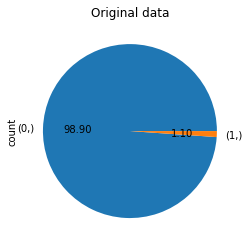

In [15]:
print(y_imbal.value_counts())

ax = y_imbal.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Original data")

In [16]:
X_imbal.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.2,0.440867,11,1,50,0.013842,-1.453504,1088,7887.055866,4966.949150,...,False,False,False,True,False,True,False,False,False,False
1,0.2,0.134098,-1,63,40,0.014849,-0.816064,2699,7820.476550,5641.371071,...,False,False,False,True,False,False,False,True,False,False
2,0.7,0.849654,-1,54,50,0.030183,-1.214461,592,8631.844377,5803.389147,...,False,False,False,True,False,False,False,False,True,False
3,0.8,0.999076,26,10,30,0.008373,-1.051996,700,4474.571759,2387.451481,...,False,False,False,True,False,False,False,True,False,False
4,0.8,0.289077,-1,243,60,0.006288,-1.137048,827,3437.659491,3434.216277,...,False,False,False,True,False,True,False,False,False,False


In [17]:
X_test = imbal_test_df.drop(columns=['fraud_bool'], axis=1)
y_test = imbal_test_df[['fraud_bool']]

## Baseline Models

Using Logistic regression as the baseline model for all imbalanced dataset handling technique, except for Ensemble.

In [30]:
## Logistic Regression
log_classifier = LogisticRegression(random_state = 0,solver='lbfgs', max_iter=1000)
log_classifier.fit(X_imbal, y_imbal)

y_pred_baseline = log_classifier.predict(X_test)

/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
accuracy, precision, recall, f1, roc_auc = return_model_evaluation(y_test, y_pred_baseline) 

technique = "Baseline"
print(f"""Overall Model evaluation for {technique}:\n
    Accuracy:{accuracy}%
    Precision:{precision}%
    Recall:{recall}%
    F1-score:{f1}%
    AUC-ROC:{roc_auc}%""")

print(f"\nClass level model evaluation:\n\n{return_ClassLevel_model_evaluation(y_test, y_pred_baseline)}")

Overall Model evaluation for Baseline:

    Accuracy:98.9575%
    Precision:87.13450292397661%
    Recall:6.735985533453888%
    F1-score:12.505245488879563%
    AUC-ROC:53.36243125642298%

Class level model evaluation:

   Class  Accuracy  Precision     Recall   F1-score    ROC AUC
0      0   98.9575  98.967617  99.988877  99.475626  53.362431
1      1   98.9575  87.134503   6.735986  12.505245  53.362431


## Re-sampling techniques

### Random Undersampling

Reduce the majority class to the size of the minority class in the train dataframe.

Pro(s): Both classes will have the same number of instances for both majority and minority class so the model will not have a risk to ignoring characteristics of the minority class while learning/ training.

Con(s): A lot of data that the model could learn from to distinguish between fraudulent and non-fraudulent applications if being thrown away which means that the model will not be able to train to the best level possible.

fraud_bool
0             8818
1             8818
Name: count, dtype: int64


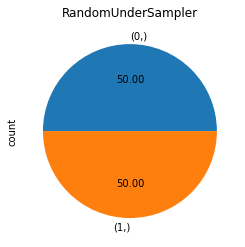

In [59]:
from imblearn.under_sampling import RandomUnderSampler

technique = "RandomUnderSampler"

# 'not minority' = resample all classes but the minority class; You can also use 1 as an input instead.
undersampler = RandomUnderSampler(sampling_strategy="not minority")
X_imbal_under , y_imbal_under = undersampler.fit_resample(X_imbal, y_imbal)

print(y_imbal_under.value_counts())

ax = y_imbal_under.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title(f"{technique}")

In [60]:
## Logistic Regression
log_classifier_under = LogisticRegression(random_state = 0,solver='lbfgs', max_iter=1000)
log_classifier_under.fit(X_imbal_under, y_imbal_under) # Training

/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [61]:
y_pred_under = log_classifier_under.predict(X_test) # Predicting on the test set

accuracy, precision, recall, f1, roc_auc = return_model_evaluation(y_test, y_pred_under) # Evaluation Metrics

print(f"""Overall Model evaluation for {technique}:\n
    Accuracy:{accuracy}%
    Precision:{precision}%
    Recall:{recall}%
    F1-score:{f1}%
    AUC-ROC:{roc_auc}%""")

print(f"\nClass level model evaluation:\n\n{return_ClassLevel_model_evaluation(y_test, y_pred_under)}")

Overall Model evaluation for RandomUnderSampler:

    Accuracy:78.57650000000001%
    Precision:4.006791171477079%
    Recall:80.01808318264014%
    F1-score:7.6314484661650885%
    AUC-ROC:79.28923048043367%

Class level model evaluation:

   Class  Accuracy  Precision     Recall   F1-score   ROC AUC
0      0   78.5765  99.716348  78.560378  87.883081  79.28923
1      1   78.5765   4.006791  80.018083   7.631448  79.28923


### Random Oversampling

The instances from minority class are duplicated in the training dataset to make the number of its occurance the same as the occurances (value counts) of the majority class.

Pro(s): All the instances from the majority class are being used to train the identify the non-fradulent cases. The patterns in the minority instances are more likely to be well-studied by the training model to identify those cases.

Con(s): The minority instances will still be just a duplication in the dataset, it would help the training model if it had more unique minority instances to learn from.

fraud_bool
0             791182
1             791182
Name: count, dtype: int64


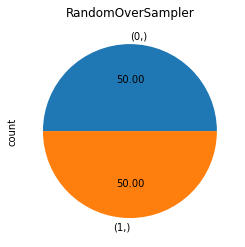

In [62]:
from imblearn.over_sampling import RandomOverSampler

technique = "RandomOverSampler"

# 'not majority' = resample all classes but the majority class; You can also use 1 as an input instead.
oversampler = RandomOverSampler(sampling_strategy="not majority")
X_imbal_over, y_imbal_over = oversampler.fit_resample(X_imbal, y_imbal)

print(y_imbal_over.value_counts())

ax = y_imbal_over.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title(f"{technique}")

In [63]:
## Logistic Regression
log_classifier_over = LogisticRegression(random_state = 0,solver='lbfgs', max_iter=1000)
log_classifier_over.fit(X_imbal_over, y_imbal_over) # Training

y_pred_over = log_classifier_over.predict(X_test) # Predicting on the test set

/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
accuracy, precision, recall, f1, roc_auc = return_model_evaluation(y_test, y_pred_over) # Evaluation Metrics

print(f"""Overall Model evaluation for {technique}:\n
    Accuracy:{accuracy}%
    Precision:{precision}%
    Recall:{recall}%
    F1-score:{f1}%
    AUC-ROC:{roc_auc}%""")

print(f"\nClass level model evaluation:\n\n{return_ClassLevel_model_evaluation(y_test, y_pred_over)}")

Overall Model evaluation for RandomOverSampler:

    Accuracy:79.9005%
    Precision:4.1961077483299976%
    Recall:78.6618444846293%
    F1-score:7.967215366652167%
    AUC-ROC:79.28809861297415%

Class level model evaluation:

   Class  Accuracy  Precision     Recall   F1-score    ROC AUC
0      0   79.9005  99.702270  79.914353  88.718319  79.288099
1      1   79.9005   4.196108  78.661844   7.967215  79.288099


### SMOTE (Synthetic Minority Over-Sampling Technique)

This algorithm uses k-Nearest Neighbours algorithm to create synthetic samples of the minority class from the training dataset.

Python uses imblearn package for SMOTE.

Note: 
    
The below cell was giving me this error which seemed to be related to the 'threadpoolctl' library in the details:
`AttributeError: 'NoneType' object has no attribute 'split'`

So I ran the following codes to ugrade my library:<br>
`pip install --upgrade threadpoolctl`

If this doesn't work try the below upgrades as well:<br>
<br>
`pip install --upgrade imbalanced-learn scikit-learn
pip uninstall openblas
pip install openblas`

If you do run the above queries, make sure the are in different cells. Jupyter notebook cannot run multiple install and uninstall commands in one cell in some environments

fraud_bool
0             791182
1             791182
Name: count, dtype: int64


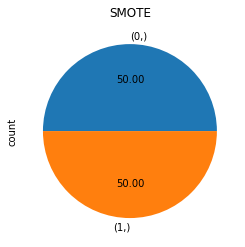

In [18]:
from imblearn.over_sampling import SMOTE

technique = "SMOTE"

X_imbal_smote, y_imbal_smote = SMOTE(random_state=0).fit_resample(X_imbal, y_imbal)

print(y_imbal_smote.value_counts())

ax = y_imbal_smote.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title(f"{technique}")

In [19]:
## Logistic Regression
log_classifier_smote = LogisticRegression(random_state = 0,solver='lbfgs', max_iter=1000)
log_classifier_smote.fit(X_imbal_smote, y_imbal_smote) # Training

/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [20]:
y_pred_smote = log_classifier_smote.predict(X_test) # Predicting on the test set

accuracy, precision, recall, f1, roc_auc = return_model_evaluation(y_test, y_pred_smote) # Evaluation Metrics

print(f"""Overall Model evaluation for {technique}:\n
    Accuracy:{accuracy}%
    Precision:{precision}%
    Recall:{recall}%
    F1-score:{f1}%
    AUC-ROC:{roc_auc}%""")

print(f"\nClass level model evaluation:\n\n{return_ClassLevel_model_evaluation(y_test, y_pred_smote)}")

Overall Model evaluation for SMOTE:

    Accuracy:85.73150000000001%
    Precision:5.352599979647909%
    Recall:71.3381555153707%
    F1-score:9.958034897295933%
    AUC-ROC:78.61531312080142%

Class level model evaluation:

   Class  Accuracy  Precision     Recall   F1-score    ROC AUC
0      0   85.7315  99.628194  85.892471  92.251844  78.615313
1      1   85.7315   5.352600  71.338156   9.958035  78.615313


### ADASYN (Adaptive Synthetic Sampling Method)

ADASYN focuses on generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier while the basic implementation of SMOTE will not make any distinction between easy and hard samples to be classified using the nearest neighbors rule. Therefore, the decision function found during training will be different among the algorithms.

In [21]:
## If below row gives error: uncomment, run this cell and restart Kernel
# pip install --upgrade threadpoolctl

[('fraud_bool', 1)]
fraud_bool
0             791182
1             791135
Name: count, dtype: int64


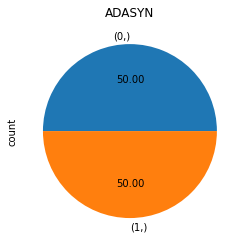

In [22]:
from imblearn.over_sampling import ADASYN

technique = "ADASYN"

X_imbal_adasyn, y_imbal_adasyn = ADASYN(random_state=0).fit_resample(X_imbal, y_imbal)
print(sorted(Counter(y_imbal_adasyn).items()))

print(y_imbal_adasyn.value_counts())

ax = y_imbal_adasyn.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title(f"{technique}")

In [23]:
## Logistic Regression
log_classifier_adasyn = LogisticRegression(random_state = 0,solver='lbfgs', max_iter=1000)
log_classifier_adasyn.fit(X_imbal_adasyn, y_imbal_adasyn) # Training

/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [24]:
y_pred_adasyn = log_classifier_adasyn.predict(X_test) # Predicting on the test set

accuracy, precision, recall, f1, roc_auc = return_model_evaluation(y_test, y_pred_adasyn) # Evaluation Metrics

print(f"""Overall Model evaluation for {technique}:\n
    Accuracy:{accuracy}%
    Precision:{precision}%
    Recall:{recall}%
    F1-score:{f1}%
    AUC-ROC:{roc_auc}%""")

print(f"\nClass level model evaluation:\n\n{return_ClassLevel_model_evaluation(y_test, y_pred_adasyn)}")

Overall Model evaluation for ADASYN:

    Accuracy:85.506%
    Precision:5.149078726968175%
    Recall:69.48462929475588%
    F1-score:9.58767388185391%
    AUC-ROC:77.584903682102%

Class level model evaluation:

   Class  Accuracy  Precision     Recall   F1-score    ROC AUC
0      0    85.506  99.603291  85.685178  92.121499  77.584904
1      1    85.506   5.149079  69.484629   9.587674  77.584904


### Ensemble Method

Use algorithms like Random Forest to divide the dataset in different batches such that each batch has same number of manority and majority instances. Each batch is then used to train an independent model. 

When producing the test dataset out or real-life predictions, the majority vote from all independent models is used to make the prediction. 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

technique = "RandomForestClassifier"

# Random Forest with class weights
randomf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Notice that we directly take the imbalanced datasets here
randomf.fit(X_imbal, y_imbal)

/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
y_pred_randomf = randomf.predict(X_test) # Predicting on the test set

print(classification_report(y_test, y_pred_randomf))

accuracy, precision, recall, f1, roc_auc = return_model_evaluation(y_test, y_pred_randomf) # Evaluation Metrics

print(f"""Overall Model evaluation for {technique}:\n
    Accuracy:{accuracy}%
    Precision:{precision}%
    Recall:{recall}%
    F1-score:{f1}%
    AUC-ROC:{roc_auc}%""")

print(f"\nClass level model evaluation:\n\n{return_ClassLevel_model_evaluation(y_test, y_pred_randomf)}")

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    197788
           1       0.94      0.20      0.33      2212

    accuracy                           0.99    200000
   macro avg       0.96      0.60      0.66    200000
weighted avg       0.99      0.99      0.99    200000

Overall Model evaluation for RandomForestClassifier:

    Accuracy:99.1025%
    Precision:93.71069182389937%
    Recall:20.207956600361662%
    F1-score:33.246560059501675%
    AUC-ROC:60.0963944224936%

Class level model evaluation:

   Class  Accuracy  Precision     Recall   F1-score    ROC AUC
0      0   99.1025  99.115390  99.984832  99.548213  60.096394
1      1   99.1025  93.710692  20.207957  33.246560  60.096394


### Weighted Algorithm

Weighted algorithms like SVM with class weights or decision trees with class weights address the imbalance by adjusting the weights assigned to instances during the training process. The intent is to motivate the algorithm to focus more on correctly classifying the minority class.

Simpler to implement because it usually only requires single parameter adjustments.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

technique = 'Weighted Support Vector Machine'

# Define SVM with class weights
wighted_svm = SVC(class_weight='balanced', kernel='linear', random_state=42)

# Notice that we directly take the imbalanced datasets here to train
wighted_svm.fit(X_imbal, y_imbal)

/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_wt_svm = wighted_svm.predict(X_test) # Predicting on the test set

print(classification_report(y_test, y_pred_wt_svm))

accuracy, precision, recall, f1, roc_auc = return_model_evaluation(y_test, y_pred_wt_svm) # Evaluation Metrics

print(f"""Overall Model evaluation for {technique}:\n
    Accuracy:{accuracy}%
    Precision:{precision}%
    Recall:{recall}%
    F1-score:{f1}%
    AUC-ROC:{roc_auc}%""")

print(f"\nClass level model evaluation:\n\n{return_ClassLevel_model_evaluation(y_test, y_pred_wt_svm)}")

### Cost-sensitive algorithm

Modifies the loss function or optimization objective to the algorithm to account for the misclassification costs.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define SVM with custom misclassification costs
cost_svm = SVC(C=1, class_weight={0: 1, 1: 10}, kernel='linear', random_state=42)
# Here, the cost of misclassifying the minority class (1) is set to 10
# C is the regularization parameter and needs to be positive. The strength of the regularization is inversely proportional to C. The penalty is a squared l2 penalty.

# Notice that we directly take the imbalanced datasets here to train
cost_svm.fit(X_imbal, y_imbal)

# Make predictions
y_pred_cost_svm = cost_svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_cost_svm))


### Focal Loss

LOSS function that heavily penalizes the majority class and gives higher weightage to the minority class.

Reference: https://medium.com/analytics-vidhya/how-focal-loss-fixes-the-class-imbalance-problem-in-object-detection-3d2e1c4da8d7#:~:text=Focal%20loss%20is%20very%20useful,is%20simple%20and%20highly%20effective